<a href="https://colab.research.google.com/github/89874106365/dianasabirova/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%84%D0%B8%D0%B3%D1%83%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Распознавание объемных и плоских фигур в геометрии

In [1]:
!pip install tensorflow==2.12.1

In [2]:
from keras.models import load_model
from PIL import Image, ImageOps, ImageDraw, ImageFont
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

model = load_model("keras_model.h5", compile=False)
class_names = open("labels.txt", "r").readlines()

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    image_array = np.asarray(image, dtype=np.float32)

    normalized_image_array = (image_array / 127.5) - 1

    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index].strip()
    confidence_score = prediction[0][index]

    return index, class_name, confidence_score

Saving 3.png to 3 (1).png
1/1 [==============================] - 0s 42ms/step


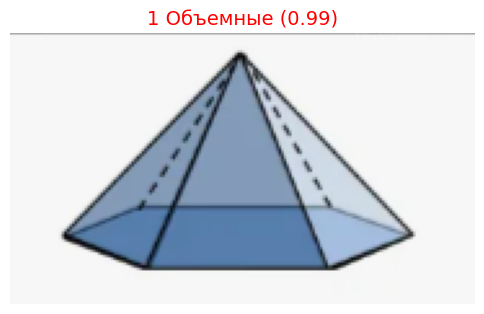

Объемная фигура: 0.99


In [4]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

index, predicted_class, confidence = predict_image(image_path)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"{predicted_class} ({confidence:.2f})", fontsize=14, color="red")
plt.show()


if index == 0:
    print(f"Плоская фигура: {confidence:.2f}")
elif index == 1:
    print(f"Объемная фигура: {confidence:.2f}")